In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [2]:
from koho.sklearn import DecisionTreeClassifier, DecisionForestClassifier
clf = DecisionForestClassifier(random_state=0)

In [3]:
clf.fit(X, y)

DecisionForestClassifier(bootstrap=False, class_balance='balanced',
             max_depth=3, max_features='auto', max_thresholds=None,
             missing_values=None, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=0)

In [4]:
feature_importances = clf.feature_importances_
print(feature_importances)

[0.09045256 0.00816573 0.38807981 0.5133019 ]


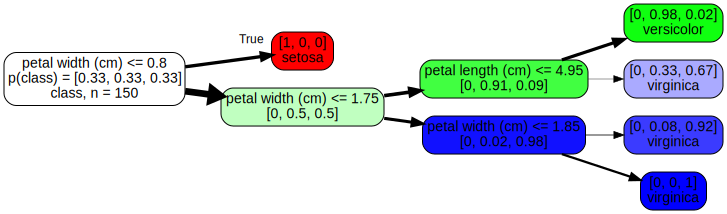

In [5]:
# $: conda install python-graphviz
import graphviz
tree_idx = 0
dot_data = clf.estimators_[tree_idx].export_graphviz(
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rotate=True)
graph = graphviz.Source(dot_data)
graph

In [6]:
graph.render("iris", format='png')

'iris.png'

In [7]:
t = clf.estimators_[tree_idx].export_text()
print(t)

0 X[3]<=0.8 [50, 50, 50]; 0->1; 0->2; 1 [50, 0, 0]; 2 X[3]<=1.75 [0, 50, 50]; 2->3; 2->6; 3 X[2]<=4.95 [0, 49, 5]; 3->4; 3->5; 4 [0, 47, 1]; 5 [0, 2, 4]; 6 X[3]<=1.85 [0, 1, 45]; 6->7; 6->8; 7 [0, 1, 11]; 8 [0, 0, 34]; 


In [8]:
import pickle
with open("clf.pkl", "wb") as f:
    pickle.dump(clf, f)
with open("clf.pkl", "rb") as f:
    clf2 = pickle.load(f)

In [9]:
c = clf2.predict(X)
print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
cp = clf2.predict_proba(X)
print(cp)

[[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.99833333 0.00166667 0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.99833333 0.00166667 0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.98322581 0.01677419 0.        ]
 [0.98322581 0.01677419 0.        ]
 [0.99833333 0.00166667 0.        ]
 [1.         0.         0.        ]
 [0.98322581 0.01677419 0.        ]
 [1.         0.         0.        ]
 [0.99833333 0.00166667 0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.  

In [11]:
score = clf2.score(X, y)
print("Score: %f" % score)

Score: 0.966667


In [12]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(DecisionForestClassifier(random_state=0))
pipe.fit(X, y)
pipe.predict(X)
pipe.predict_proba(X)
score = pipe.score(X, y)
print("Score: %f" % score)

Score: 0.966667


In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 20],
               'bootstrap': [False, True],
               'max_features': [None, 1],
               'max_thresholds': [None, 1]}]
grid_search = GridSearchCV(DecisionForestClassifier(random_state=0), parameters, cv=3, iid=False)
grid_search.fit(X, y)
print(grid_search.best_params_)
clf = DecisionForestClassifier(random_state=0)
clf.set_params(**grid_search.best_params_)
clf.fit(X, y)
score = clf.score(X, y)
print("Score: %f" % score)

{'bootstrap': False, 'max_features': None, 'max_thresholds': 1, 'n_estimators': 10}
Score: 0.966667


In [15]:
# $: conda install dask distributed
from dask.distributed import Client
client = Client()
# Firefox: http://localhost:8787/status

In [16]:
clf = DecisionForestClassifier(random_state=0)
from sklearn.externals.joblib import parallel_backend
with parallel_backend('dask', n_jobs=-1):  # 'loky' when not using dask
    clf.fit(X, y)
    score = clf.score(X, y)
print("Score: %f" % score)

Score: 0.966667
